In [10]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import os
from natsort import natsorted

def plot_image(img, figsize_in_inches=(5,5)):
    fig, ax = plt.subplots(figsize=figsize_in_inches)
    ax.imshow(img)
    plt.show()
    
def plot_images(imgs, figsize_in_inches=(5,5)):
    fig, axs = plt.subplots(1, len(imgs), figsize=figsize_in_inches)
    for col, img in enumerate(imgs):
        axs[col].imshow(img)

In [25]:
# Path to the folder containing the images
folder_path = "D:/Tests/Column_test/Images_Calibrated/"

# Read in the images from the folder and sort them using natsort
files = natsorted(os.listdir(folder_path))
images = [(os.path.join(folder_path, file )) for file in files]

In [47]:
from stitching import Stitcher
settings = {# The whole plan should be considered
            "crop": True,
            # The matches confidences aren't that good
            "confidence_threshold": 0.5,
            "detector": "sift"} 

stitcher = Stitcher(**settings)
panorama = stitcher.stitch(images)


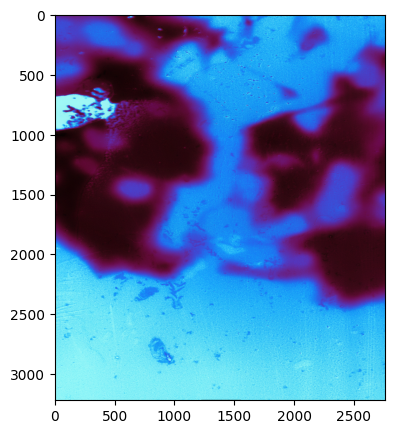

(3220, 2759, 3)
uint8


In [48]:
plot_image(panorama, (10,5))
print(np.shape(panorama))
print(panorama.dtype)

In [ ]:
cv.imwrite("D:/panorama.tiff",panorama)

In [35]:
from stitching import AffineStitcher

settings = {# The whole plan should be considered
            "crop": True,
            # The matches confidences aren't that good
            "confidence_threshold": 0.4}    

stitcher = AffineStitcher(**settings)
panorama = stitcher.stitch(images)

plot_image(panorama, (20,20))

StitchingError: Rectangles do not overlap!

In [ ]:
from stitching import AffineStitcher
from stitching import Stitcher

# Comparison:
print(Stitcher.DEFAULT_SETTINGS)
print(AffineStitcher.DEFAULT_SETTINGS)